In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.141872,-1.700399,-1.344524,-0.768953,-1.018438,1
1,0.533277,-0.887198,0.290915,-0.782710,1.048439,1
2,2.063987,-1.328155,1.683232,3.406335,0.700031,0
3,0.691599,-1.537697,-2.955494,0.487019,2.123316,1
4,0.537858,-0.476687,0.057855,-0.582557,0.942854,1


In [6]:
df.sample(5)

,col1,col2,col3,col4,col5,target
25,-0.505669,-1.006437,2.568978,1.806414,1.788524,0
55,1.059508,-0.378976,2.050796,2.842132,1.440111,0
96,-0.182243,-0.284186,1.019110,-0.050710,1.329095,0
61,0.066226,-0.908425,0.201694,-0.599705,-1.610282,1
50,1.219987,-0.207419,1.283568,0.678594,-1.209731,1


In [8]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [15]:
import random
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [24]:
#import random
#cols = random.sample(df.columns.tolist()[:-1],int(.5*(df.shape[1]-1)))
#cols

['col1', 'col2']

In [17]:
#new_df = df[cols]
#new_df


In [23]:
#df.sample(int(.5*df.shape[0]),replace=True)
df.sample()

,col1,col2,col3,col4,col5,target
99,-0.787564,-0.283217,2.580726,-3.257397,0.087547,1


In [18]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [29]:
 #new_df = sample_rows(df,.5)
 #new_df   

In [31]:
import warnings as wr
wr.filterwarnings('ignore')

df1 = combined_sampling(df,0.5,0.5)

In [32]:
df2 = combined_sampling(df,0.5,0.5)

In [33]:
df3 = combined_sampling(df,0.5,0.5)

In [34]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col5', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [36]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [37]:
from sklearn.tree import plot_tree

[Text(0.5588235294117647, 0.95, 'x[0] <= -0.036\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.5, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6176470588235294, 0.85, 'x[0] <= 2.574\ngini = 0.466\nsamples = 46\nvalue = [29, 17]'),
 Text(0.35294117647058826, 0.75, 'x[1] <= 1.257\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(0.23529411764705882, 0.65, 'x[0] <= 1.902\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.17647058823529413, 0.55, 'x[0] <= 1.29\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.11764705882352941, 0.45, 'x[0] <= 0.213\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.058823529411764705, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.17647058823529413, 0.35, 'x[0] <= 0.481\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.11764705882352941, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23529411764705882, 0.25, 'x[1] <= -0.695\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.176470588235294

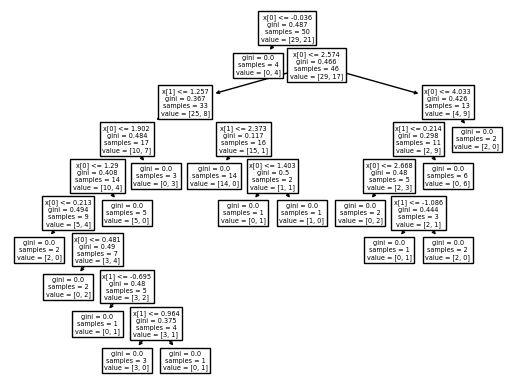

In [38]:
plot_tree(clf1)

[Text(0.45454545454545453, 0.9642857142857143, 'x[1] <= -0.12\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.18181818181818182, 0.8928571428571429, 'x[0] <= -0.246\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.09090909090909091, 0.8214285714285714, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.8214285714285714, 'x[1] <= -1.223\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.18181818181818182, 0.75, 'x[1] <= -1.257\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.09090909090909091, 0.6785714285714286, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2727272727272727, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7272727272727273, 0.8928571428571429, 'x[1] <= 3.059\ngini = 0.388\nsamples = 38\nvalue = [28, 10]'),
 Text(0.6363636363636364, 0.8214285714285714, 'x[0] <= 1.941\ngini = 0.346\nsamples = 36\nvalue = [28, 8]'),
 Text(0

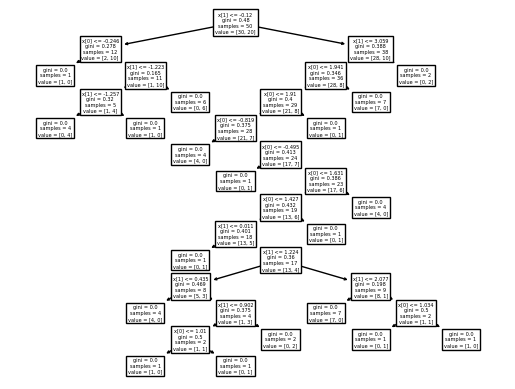

In [39]:
plot_tree(clf3)

In [40]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([1])

In [41]:
clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([1])

In [42]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([0])

In [45]:
df.sample(3,replace=True)

,col1,col2,col3,col4,col5,target
83,1.500513,-0.071465,2.351231,0.555591,-1.326268,1
41,0.328763,-3.342420,2.300464,-1.874870,0.045685,0
52,-0.890933,-1.020498,1.648781,-1.052746,0.720902,0
